# Assignment 9 (Association Rules) book dataset

## Q. Prepare rules for the all the data sets 
## 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
## 2) Change the minimum length in apriori algorithm
## 3) Visulize the obtained rules using different plots 

In [1]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in c:\users\admin\anaconda3\lib\site-packages (3.4.2)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [6]:
# Loading the Dataset
book_df = pd.read_csv('book.csv')

In [7]:
book_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [8]:
book_df1 = book_df.copy()

In [9]:
book_df1.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
book_df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [11]:
book_df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [12]:
book_df1.shape

(2000, 11)

In [13]:
items = {}

In [14]:
tse = TransactionEncoder()

In [15]:
tse1 = tse.fit(book_df1).transform(book_df1)

In [16]:
apr = pd.DataFrame(tse1, columns=tse.columns_)

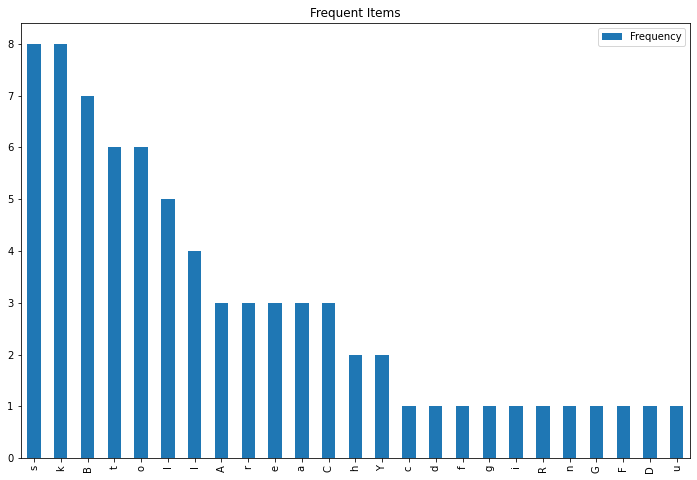

In [17]:
apr.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

## Apriori algorithm 

In [18]:
apr_0_5 = {}
apr_1 = {}
apr_5 = {}
apr_1_0 = {}

In [19]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [20]:
def gen_rules(book_df,confidence,support):
    apr = {}
    for i in confidence:
        apr_i =apriori(book_df1,support,True)
        rule= association_rules(apr_i,min_threshold=i)
        apr[i] = len(rule.antecedents)
    return pd.Series(apr).to_frame("Support: %s"%support)

In [21]:
conf = []

In [22]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    apr_i = gen_rules(apr,confidence=confidence,support=i)
    conf.append(apr_i)

In [23]:
all_conf = pd.concat(conf,axis=1)

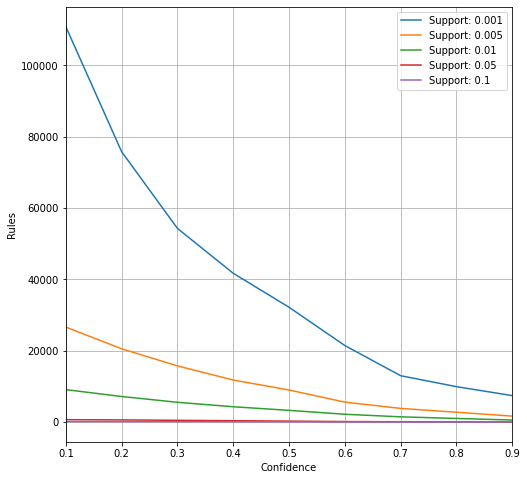

In [24]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Conclusion

## As shown in above graph

   ## Lower the Confidence level Higher the no. of rules.
   ## Higher the Support, lower the no. of rules.

## Lets try with Support 0.01 and Confidence at 0.4

In [25]:
apr_final =  apriori(apr,0.001,True)

In [26]:
rules_final = association_rules(apr_final,min_threshold=.4,support_only=False)

In [27]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.0010,0.666667,333.333333,0.000997,2.994000
2,(a),(A),0.0015,0.0015,0.0010,0.666667,444.444444,0.000998,2.995500
3,(A),(a),0.0015,0.0015,0.0010,0.666667,444.444444,0.000998,2.995500
5,(A),(l),0.0015,0.0025,0.0010,0.666667,266.666667,0.000996,2.992500
6,(r),(A),0.0015,0.0015,0.0010,0.666667,444.444444,0.000998,2.995500
7,(A),(r),0.0015,0.0015,0.0010,0.666667,444.444444,0.000998,2.995500
8,(A),(s),0.0015,0.0040,0.0010,0.666667,166.666667,0.000994,2.988000
10,(A),(t),0.0015,0.0030,0.0015,1.000000,333.333333,0.001496,inf
11,(C),(B),0.0015,0.0035,0.0010,0.666667,190.476190,0.000995,2.989500
12,(Y),(B),0.0010,0.0035,0.0010,1.000000,285.714286,0.000996,inf


In [28]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

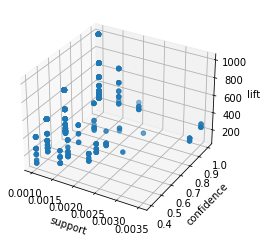

In [29]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

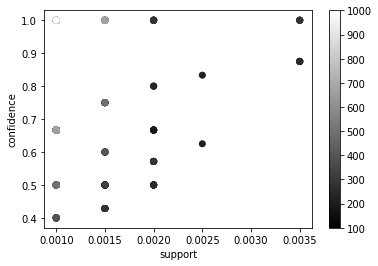

In [30]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")